In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
%matplotlib inline
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 30})

In [2]:
benergy_c = np.arange(-7.5, -5.25, 0.25)
benergy_o = np.arange(-3.25, -5.5, -0.25)

In [3]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))

In [17]:
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            # f_path = '{}_c{:.2f}o{:.2f}/sim_data/complete_rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
#             ch4_conv = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'Max CH4 Conv'].to_list()[0]
            ch4_in = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'CH4 in'].to_list()[0]
            ch4_out = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'CH4 out'].to_list()[0]
            ch4_conv = (ch4_in - ch4_out) / ch4_in
            if abs(ch4_conv) > 1:
                data[j][i] = 0
            else:
                data[j][i] = abs(ch4_conv)
        except Exception as e:
            print(e, f"check log files {index}")
data 

[Errno 2] No such file or directory: '74.0_c-7.50o-3.50/sim_data/rtol_1e-08_atol_1e-16_data.csv' check log files 74.0


array([[3.47476200e-01, 3.53013054e-01, 3.53130760e-01, 3.47536286e-01,
        3.09750066e-01, 2.78923836e-01, 2.75536319e-01, 2.70746785e-01,
        2.67161471e-01],
       [7.39112834e-16, 3.49270054e-01, 3.51256172e-01, 3.46848310e-01,
        3.21267719e-01, 2.62559517e-01, 2.00535478e-01, 1.75732513e-01,
        1.70333437e-01],
       [8.61482068e-13, 3.48856950e-01, 3.51355483e-01, 3.46294287e-01,
        3.35593460e-01, 2.96540064e-01, 2.18850103e-01, 1.70081950e-01,
        1.54360601e-01],
       [8.65756597e-13, 3.52958353e-01, 3.54429231e-01, 3.48459701e-01,
        3.34749015e-01, 2.87735637e-01, 1.12923644e-01, 5.42952791e-02,
        4.90157970e-02],
       [8.61482068e-13, 3.51396262e-01, 3.52560164e-01, 3.43564085e-01,
        3.04791397e-01, 1.02838208e-01, 7.85384112e-03, 5.95532236e-03,
        5.70444859e-03],
       [8.63783737e-13, 1.06918624e-02, 3.28940905e-01, 2.72888244e-01,
        3.77648344e-03, 9.24023180e-04, 7.21071342e-04, 6.86892725e-04,
        6.7

In [18]:
ch4_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
ch4_conv_df

,-7.50,-7.25,-7.00,-6.75,-6.50,-6.25,-6.00,-5.75,-5.50
-3.25,3.474762e-01,0.353013,0.353131,0.347536,3.097501e-01,2.789238e-01,2.755363e-01,2.707468e-01,2.671615e-01
-3.50,7.391128e-16,0.349270,0.351256,0.346848,3.212677e-01,2.625595e-01,2.005355e-01,1.757325e-01,1.703334e-01
-3.75,8.614821e-13,0.348857,0.351355,0.346294,3.355935e-01,2.965401e-01,2.188501e-01,1.700819e-01,1.543606e-01
-4.00,8.657566e-13,0.352958,0.354429,0.348460,3.347490e-01,2.877356e-01,1.129236e-01,5.429528e-02,4.901580e-02
-4.25,8.614821e-13,0.351396,0.352560,0.343564,3.047914e-01,1.028382e-01,7.853841e-03,5.955322e-03,5.704449e-03
-4.50,8.637837e-13,0.010692,0.328941,0.272888,3.776483e-03,9.240232e-04,7.210713e-04,6.868927e-04,6.797666e-04
-4.75,8.644414e-13,0.010688,0.236594,0.002095,6.723622e-05,1.530760e-05,9.708488e-06,8.358907e-06,8.092371e-06
-5.00,8.644414e-13,0.010687,0.089099,0.000044,4.060029e-06,9.682873e-07,2.516578e-07,1.102924e-07,9.859823e-08
-5.25,8.642770e-13,0.010680,0.007495,0.000003,4.381162e-07,8.351666e-08,1.104941e-08,4.986391e-09,4.816379e-09


In [5]:
# metals = {'Pt': {'C':-7.02516, 'O':-3.81153}, 'Pd':{'C':-7.16786, 'O':-4.13577}, 'Rh':{'C':-7.33484, 'O':-4.71419}, 
#           'Ru': {'C':-7.5979, 'O':-5.4492}, 'Ni': {'C':-6.79794, 'O':-4.98902}}
metals = {'Pt': {'C':-7.02516, 'O':-3.81153}, 'Pd':{'C':-7.16786, 'O':-4.13577}, 'Rh':{'C':(-6.65 - 7.11) / 2, 'O':(-4.31 - 4.88) / 2}, 'Ni': {'C':-6.79794, 'O':-4.98902}}
metal_x = []
metal_y = []
metal_names = []
for i, v in metals.items():
    metal_x.append(abs(v['C'] + 7.5) / 2.25 * 9)
    metal_y.append(abs(v['O'] + 3.125) / 2.25 * 9)
    metal_names.append(i)

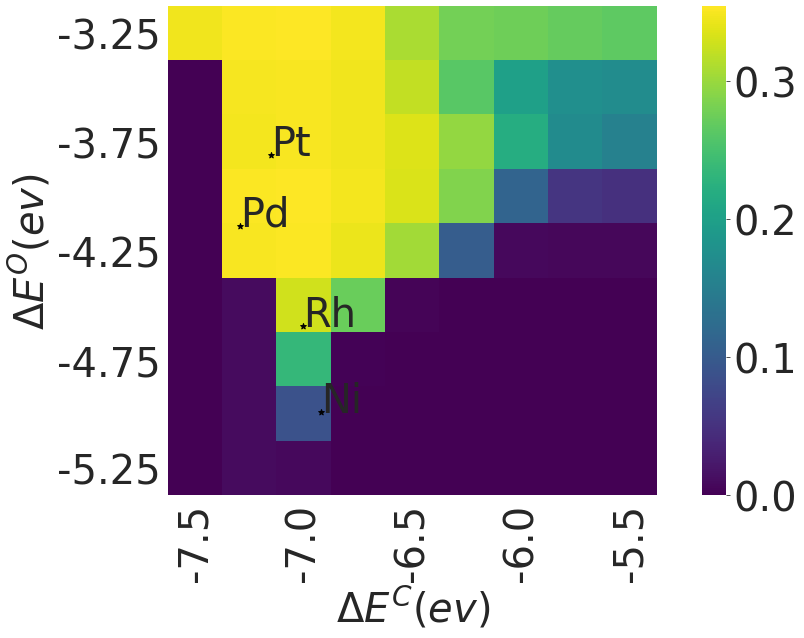

In [20]:
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 40})
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
xticks = np.linspace(-5.5,-3.0,5)
yticks = np.linspace(-7.5, -5.25, 5)
ax = sns.heatmap(ch4_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="CH4 Conversion at C/O=0.6 without BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
plt.savefig('paper_plots/0.6_ch4_conv_original.pdf', bbox_inches='tight')

## Heat Map For Syngas Conversion at C/O=0.6

In [21]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            # f_path = '{}_c{:.2f}o{:.2f}/sim_data/complete_rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            h2_out = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'H2 out'].to_list()[0]
            co_out = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'CO out'].to_list()[0]
            ch4_in = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'CH4 in'].to_list()[0]
            syngas_conv = (co_out + h2_out/2) / ch4_in
#             if abs(syngas_conv) > 1:
#                 data[j][i] = 0
#             else:
            data[j][i] = abs(syngas_conv)
        except Exception as e:
            print(e, f"check log files {index}")
data 

[Errno 2] No such file or directory: '74.0_c-7.50o-3.50/sim_data/rtol_1e-08_atol_1e-16_data.csv' check log files 74.0


array([[3.88349214e-01, 3.90432891e-01, 3.87662295e-01, 3.77181498e-01,
        2.37836990e-01, 1.01784717e-01, 5.39902748e-03, 9.61486366e-06,
        1.61136863e-06],
       [0.00000000e+00, 4.12373158e-01, 4.11008364e-01, 4.00406613e-01,
        3.30086906e-01, 1.52163291e-01, 1.22392278e-05, 7.52397349e-07,
        1.27361648e-07],
       [3.58785084e-11, 4.26115663e-01, 4.27019375e-01, 4.14737875e-01,
        3.90163666e-01, 2.85614770e-01, 6.91442294e-02, 3.02834774e-06,
        5.31415522e-07],
       [3.58777938e-11, 4.30773744e-01, 4.31176658e-01, 4.18929323e-01,
        3.90548862e-01, 2.96522753e-01, 1.40431157e-02, 9.86884508e-06,
        5.32268609e-06],
       [3.58774177e-11, 4.27898947e-01, 4.28871622e-01, 4.12289517e-01,
        3.44328390e-01, 4.56170570e-02, 3.39531495e-05, 1.99632190e-05,
        1.86438955e-05],
       [3.58773420e-11, 2.13670756e-02, 4.01176109e-01, 3.15514351e-01,
        3.06839550e-04, 4.99182630e-05, 3.99078930e-05, 3.82097821e-05,
        3.7

In [22]:
syngas_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
syngas_conv_df

,-7.50,-7.25,-7.00,-6.75,-6.50,-6.25,-6.00,-5.75,-5.50
-3.25,3.883492e-01,0.390433,0.387662,0.377181,2.378370e-01,1.017847e-01,5.399027e-03,9.614864e-06,1.611369e-06
-3.50,0.000000e+00,0.412373,0.411008,0.400407,3.300869e-01,1.521633e-01,1.223923e-05,7.523973e-07,1.273616e-07
-3.75,3.587851e-11,0.426116,0.427019,0.414738,3.901637e-01,2.856148e-01,6.914423e-02,3.028348e-06,5.314155e-07
-4.00,3.587779e-11,0.430774,0.431177,0.418929,3.905489e-01,2.965228e-01,1.404312e-02,9.868845e-06,5.322686e-06
-4.25,3.587742e-11,0.427899,0.428872,0.412290,3.443284e-01,4.561706e-02,3.395315e-05,1.996322e-05,1.864390e-05
-4.50,3.587734e-11,0.021367,0.401176,0.315514,3.068395e-04,4.991826e-05,3.990789e-05,3.820978e-05,3.798082e-05
-4.75,3.587728e-11,0.021373,0.300897,0.001485,4.169676e-05,1.098271e-05,7.026603e-06,5.953198e-06,5.737596e-06
-5.00,3.587725e-11,0.021372,0.137169,0.000051,4.090946e-06,9.378436e-07,2.211359e-07,7.209740e-08,5.800525e-08
-5.25,3.587726e-11,0.021357,0.013758,0.000004,5.671671e-07,9.304482e-08,9.020083e-09,8.837141e-10,4.039068e-10


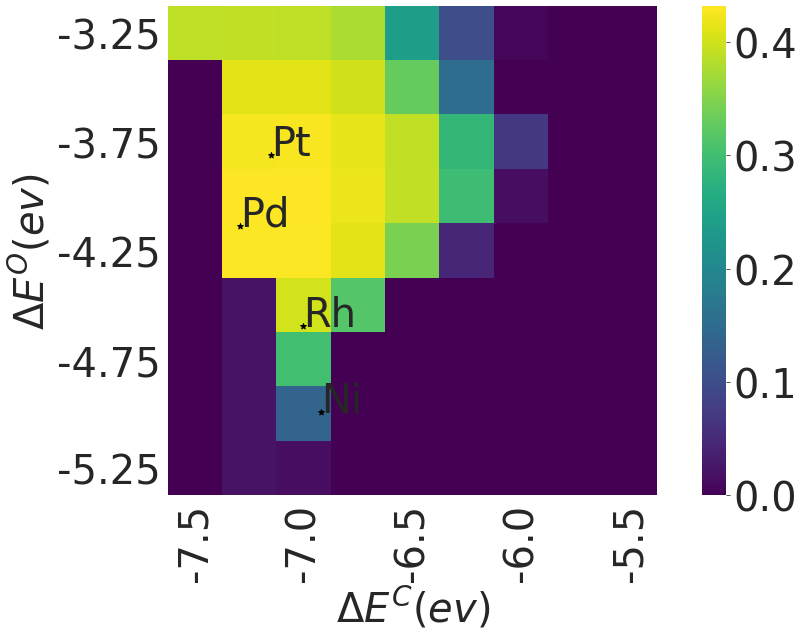

In [23]:
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 40})
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(syngas_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="Syngas Conversion at C/O=0.6 without BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
# plt.savefig('paper_plots/complete_0.6_syngas_conv_original.pdf', bbox_inches='tight')
plt.savefig('paper_plots/0.6_syngas_conv_original.pdf', bbox_inches='tight')

[Errno 2] No such file or directory: '74.0_c-7.50o-3.50/sim_data/rtol_1e-08_atol_1e-16_data.csv' check log files 74.0


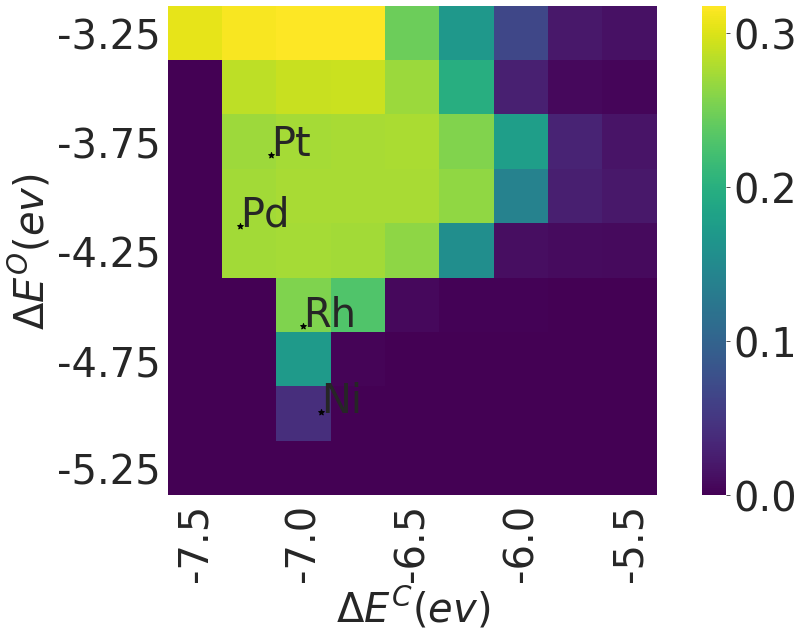

In [8]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            # f_path = '{}_c{:.2f}o{:.2f}/sim_data/complete_rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            co2_out = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'CO2 out'].to_list()[0]
            h2o_out = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'H2O out'].to_list()[0]
            ch4_in = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'CH4 in'].to_list()[0]
#             if abs(syngas_conv) > 1:
#                 data[j][i] = 0
#             else:
            data[j][i] = (abs(h2o_out)/2 + co2_out) / ch4_in
        except Exception as e:
            print(e, f"check log files {index}")
full_ox_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 40})
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
# cmap = sns.color_palette("Spectral", as_cmap=True)
ax = sns.heatmap(full_ox_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="Full Oxidation at C/O=0.6 without BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
plt.savefig('paper_plots/0.6_full_conv_original.pdf', bbox_inches='tight')
# plt.savefig('paper_plots/complete_0.6_full_conv_original.pdf', bbox_inches='tight')

# Plots at C/O = 1.0

In [14]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            # f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/complete_rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
#             ch4_conv = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'Max CH4 Conv'].to_list()[0]
            ch4_out = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'CH4 out'].to_list()[0]
            ch4_in = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'CH4 in'].to_list()[0]
            ch4_conv = (ch4_in - ch4_out) / ch4_in
            if abs(ch4_conv) > 1:
                data[j][i] = 0
            else:
                data[j][i] = abs(ch4_conv)
        except Exception as e:
            print(e, f"check log files {index}")
data 

array([[2.01109977e-11, 1.49263340e-02, 9.02789046e-01, 8.72834044e-01,
        8.25377986e-01, 7.82332820e-01, 7.55790460e-01, 7.51724352e-01,
        7.63249630e-01],
       [2.01066344e-11, 2.51490465e-02, 8.98557823e-01, 8.63850796e-01,
        8.13730562e-01, 7.73877219e-01, 7.54723743e-01, 7.54337650e-01,
        7.66372799e-01],
       [2.01089839e-11, 3.14857590e-02, 8.84689958e-01, 8.43773502e-01,
        8.02375123e-01, 7.70548501e-01, 7.55554153e-01, 7.56771917e-01,
        7.69057579e-01],
       [2.00915307e-11, 2.80384100e-02, 9.04790272e-01, 8.59364130e-01,
        8.12672951e-01, 7.75231202e-01, 7.56114191e-01, 7.56746941e-01,
        7.68965505e-01],
       [2.01009285e-11, 2.66661879e-02, 9.26671051e-01, 8.84398867e-01,
        8.36306099e-01, 7.91770899e-01, 7.60627741e-01, 7.52308805e-01,
        7.62482331e-01],
       [2.01089839e-11, 2.63744864e-02, 9.04573486e-01, 9.01155936e-01,
        8.57278608e-01, 8.02387017e-01, 7.47190985e-01, 7.10102270e-01,
        7.0

In [15]:
ch4_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
ch4_conv_df

,-7.50,-7.25,-7.00,-6.75,-6.50,-6.25,-6.00,-5.75,-5.50
-3.25,2.011100e-11,0.014926,0.902789,0.872834,0.825378,0.782333,7.557905e-01,7.517244e-01,7.632496e-01
-3.50,2.010663e-11,0.025149,0.898558,0.863851,0.813731,0.773877,7.547237e-01,7.543376e-01,7.663728e-01
-3.75,2.010898e-11,0.031486,0.884690,0.843774,0.802375,0.770549,7.555542e-01,7.567719e-01,7.690576e-01
-4.00,2.009153e-11,0.028038,0.904790,0.859364,0.812673,0.775231,7.561142e-01,7.567469e-01,7.689655e-01
-4.25,2.010093e-11,0.026666,0.926671,0.884399,0.836306,0.791771,7.606277e-01,7.523088e-01,7.624823e-01
-4.50,2.010898e-11,0.026374,0.904573,0.901156,0.857279,0.802387,7.471910e-01,7.101023e-01,7.016561e-01
-4.75,2.011021e-11,0.026365,0.152383,0.918019,0.004525,0.000406,2.155092e-04,1.774722e-04,1.701260e-04
-5.00,2.011189e-11,0.026364,0.137088,0.007161,0.000120,0.000024,6.149037e-06,2.592904e-06,2.304911e-06
-5.25,2.010261e-11,0.026355,0.134670,0.000147,0.000012,0.000002,2.853866e-07,1.312290e-07,1.265759e-07


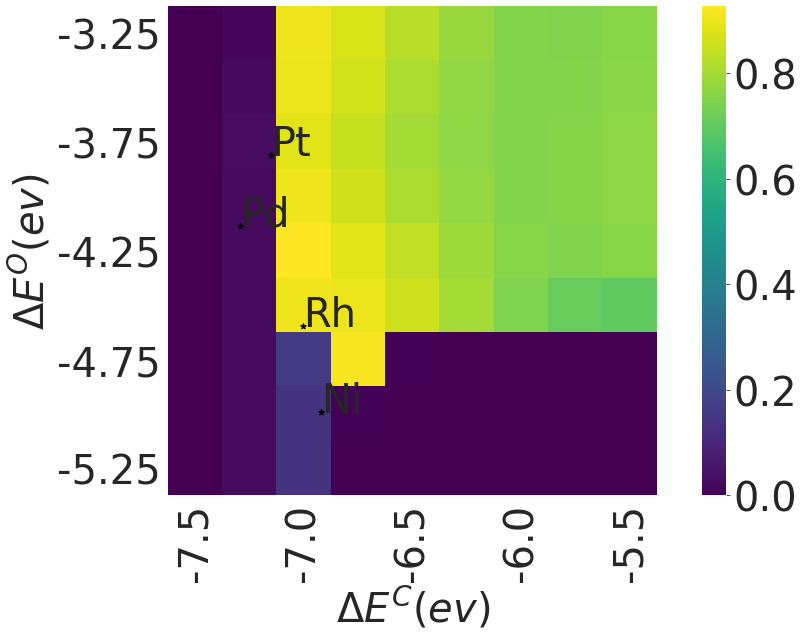

In [16]:
ch4_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(ch4_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="CH4 Conversion at C/O=1 without BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$")
ax.set(xlabel="$\\Delta E^C(ev)$", ylabel="$\\Delta E^O(ev)$")
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
# plt.savefig('paper_plots/1_ch4_conv_original.pdf', bbox_inches='tight')
plt.savefig('paper_plots/complete_1_ch4_conv_original.pdf', bbox_inches='tight')

## syngas at C/O=1.0

In [9]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            # f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/complete_rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            h2_out = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'H2 out'].to_list()[0]
            co_out = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'CO out'].to_list()[0]
            ch4_in = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'CH4 in'].to_list()[0]
            syngas_conv = (co_out + h2_out / 2) / ch4_in
#             if abs(syngas_conv) > 1:
#                 data[j][i] = 0
#             else:
            data[j][i] = abs(syngas_conv)
        except Exception as e:
            print(e, f"check log files {index}")
data 

array([[5.34184438e-10, 2.41301998e-02, 1.71382043e+00, 1.63315713e+00,
        1.50721483e+00, 1.38647466e+00, 1.28050166e+00, 1.18778335e+00,
        1.09490858e+00],
       [5.34156213e-10, 4.06926441e-02, 1.70728887e+00, 1.61986232e+00,
        1.48938866e+00, 1.36906065e+00, 1.26860912e+00, 1.17988988e+00,
        1.08781879e+00],
       [5.34129534e-10, 5.45608263e-02, 1.68731353e+00, 1.58529341e+00,
        1.47068771e+00, 1.36181397e+00, 1.26477868e+00, 1.17451571e+00,
        1.08148239e+00],
       [5.34104533e-10, 5.38550254e-02, 1.74015183e+00, 1.62320789e+00,
        1.49749405e+00, 1.38031867e+00, 1.27447796e+00, 1.17695317e+00,
        1.08048695e+00],
       [5.34090999e-10, 5.27666646e-02, 1.78937051e+00, 1.68128227e+00,
        1.55551638e+00, 1.43310548e+00, 1.31922495e+00, 1.21151046e+00,
        1.10262879e+00],
       [5.34086914e-10, 5.27139731e-02, 1.74146082e+00, 1.72263199e+00,
        1.60860371e+00, 1.46379160e+00, 1.31448004e+00, 1.18384379e+00,
        1.0

In [10]:
syngas_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
syngas_conv_df

,-7.50,-7.25,-7.00,-6.75,-6.50,-6.25,-6.00,-5.75,-5.50
-3.25,5.341844e-10,0.024130,1.713820,1.633157,1.507215,1.386475,1.280502e+00,1.187783e+00,1.094909e+00
-3.50,5.341562e-10,0.040693,1.707289,1.619862,1.489389,1.369061,1.268609e+00,1.179890e+00,1.087819e+00
-3.75,5.341295e-10,0.054561,1.687314,1.585293,1.470688,1.361814,1.264779e+00,1.174516e+00,1.081482e+00
-4.00,5.341045e-10,0.053855,1.740152,1.623208,1.497494,1.380319,1.274478e+00,1.176953e+00,1.080487e+00
-4.25,5.340910e-10,0.052767,1.789371,1.681282,1.555516,1.433105,1.319225e+00,1.211510e+00,1.102629e+00
-4.50,5.340869e-10,0.052714,1.741461,1.722632,1.608604,1.463792,1.314480e+00,1.183844e+00,1.063848e+00
-4.75,5.340839e-10,0.052717,0.299330,1.764121,0.001154,0.000134,9.233374e-05,7.976504e-05,7.698069e-05
-5.00,5.340835e-10,0.052705,0.270979,0.007766,0.000117,0.000023,5.191673e-06,1.463857e-06,1.107013e-06
-5.25,5.340840e-10,0.052678,0.265430,0.000213,0.000016,0.000002,2.284620e-07,2.006716e-08,8.008972e-09


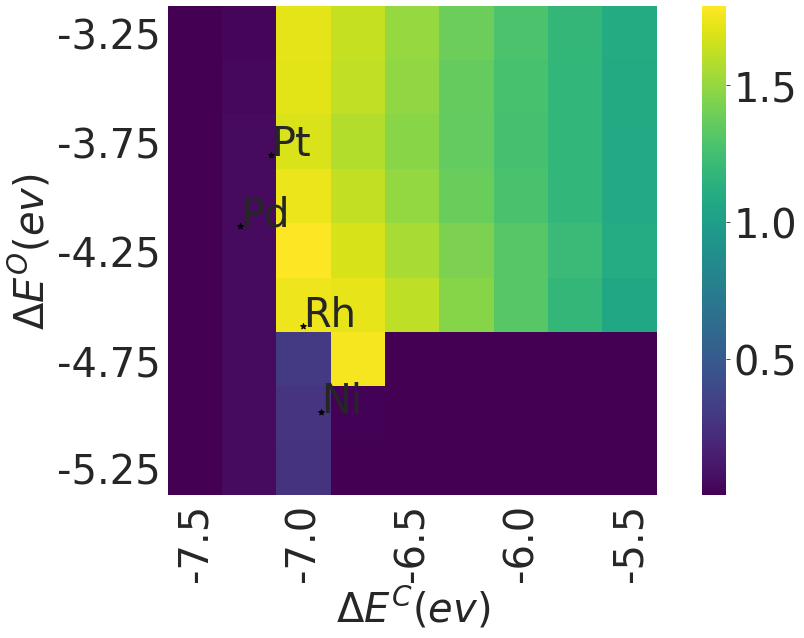

In [11]:
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(syngas_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="Syngas Conversion at C/O=1 without BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
# plt.savefig('paper_plots/1_syngas_conv_origianl.pdf', bbox_inches='tight')
plt.savefig('paper_plots/complete_1_syngas_conv_origianl.pdf', bbox_inches='tight')

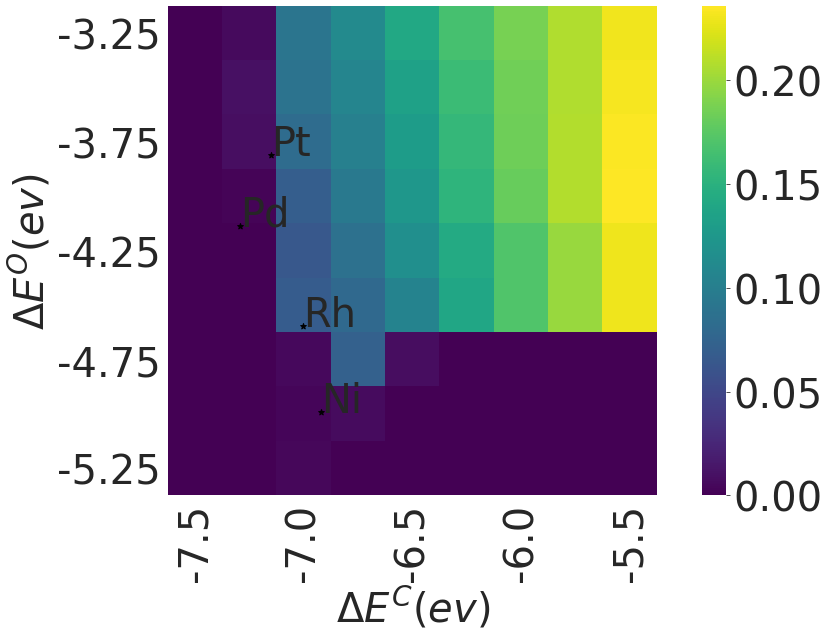

In [12]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            # f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/complete_rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            co2_out = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'CO2 out'].to_list()[0]
            h2o_out = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'H2O out'].to_list()[0]
#             if abs(syngas_conv) > 1:
#                 data[j][i] = 0
#             else:
            data[j][i] = (abs(h2o_out)/2 + abs(co2_out))/ch4_in
        except Exception as e:
            print(e, f"check log files {index}")
full_ox_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 40})
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(full_ox_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="Full Oxidation at C/O=1 without BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
# plt.savefig('paper_plots/1_full_conv_original.pdf', bbox_inches='tight')
plt.savefig('paper_plots/complete_1_full_conv_original.pdf', bbox_inches='tight')

# Plots at 2.6

In [22]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            # f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/complete_rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
#             ch4_conv = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'Max CH4 Conv'].to_list()[0]
            ch4_in = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'CH4 in'].to_list()[0]
            ch4_out = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'CH4 out'].to_list()[0]
            ch4_conv = (ch4_in - ch4_out) / ch4_in
            if abs(ch4_conv) > 1:
                data[j][i] = 0
            else:
                data[j][i] = abs(ch4_conv)
        except Exception as e:
            print(e, f"check log files {index}")
data 

array([[3.09234858e-11, 1.81717605e-10, 2.81613838e-01, 3.29538743e-01,
        3.02146623e-01, 2.78500178e-01, 2.70495814e-01, 2.78942711e-01,
        2.94924521e-01],
       [3.09291913e-11, 1.81651041e-10, 2.82324223e-01, 3.28452190e-01,
        2.99368740e-01, 2.76217267e-01, 2.73162085e-01, 2.83978087e-01,
        2.98545321e-01],
       [3.09276698e-11, 1.81684640e-10, 2.90936483e-01, 3.21327446e-01,
        2.92906675e-01, 2.75190176e-01, 2.74928588e-01, 2.85745624e-01,
        2.99609867e-01],
       [3.09258948e-11, 1.81641278e-10, 3.02823584e-01, 3.24817704e-01,
        2.95712742e-01, 2.75934008e-01, 2.74291070e-01, 2.85220616e-01,
        2.98506177e-01],
       [3.09167660e-11, 1.81608693e-10, 2.32590578e-01, 3.38045490e-01,
        3.09263024e-01, 2.82526228e-01, 2.71514358e-01, 2.79224002e-01,
        2.93691179e-01],
       [3.09191750e-11, 1.81653323e-10, 5.91160534e-02, 3.50450022e-01,
        3.27518946e-01, 2.96470130e-01, 2.69014588e-01, 2.56225643e-01,
        2.5

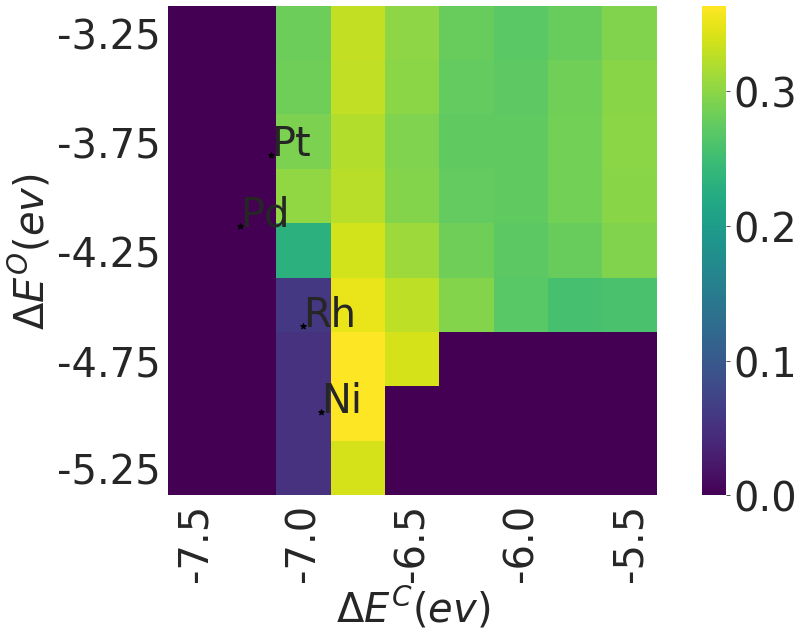

In [23]:
ch4_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
ch4_conv_df
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(ch4_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="CH4 Conversion at C/O=2.6 wihtout BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
# plt.savefig('paper_plots/2.6_ch4_conv_original.pdf')

## Syngas at C/O=2.6

In [13]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            h2_out = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'H2 out'].to_list()[0]
            co_out = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'CO out'].to_list()[0]
            ch4_in = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'CH4 in'].to_list()[0]
            syngas_conv = (co_out + h2_out / 2) / ch4_in
#             if abs(syngas_conv) > 1:
#                 data[j][i] = 0
#             else:
            data[j][i] = abs(syngas_conv)
        except Exception as e:
            print(e, f"check log files {index}")
data 

[Errno 2] No such file or directory: '74.0_c-7.50o-3.50/sim_data/rtol_1e-08_atol_1e-16_data.csv' check log files 74.0
list index out of range check log files 52.0
list index out of range check log files 10.0


array([[2.40035331e-11, 2.49915582e-10, 1.93931301e-02, 1.31026110e-01,
        1.38134388e-01, 1.09072052e-01, 7.29727260e-02, 0.00000000e+00,
        1.00114244e-02],
       [0.00000000e+00, 2.49910898e-10, 1.94434842e-02, 1.29723204e-01,
        1.32831821e-01, 1.01500333e-01, 6.75093523e-02, 3.50062839e-02,
        1.07819141e-02],
       [2.40058874e-11, 2.49849506e-10, 2.07072447e-02, 1.16619967e-01,
        1.12470788e-01, 8.89754662e-02, 6.28261788e-02, 3.30007459e-02,
        1.06094978e-02],
       [2.40018541e-11, 2.49739356e-10, 2.41295426e-02, 1.29913785e-01,
        1.20058594e-01, 9.17674364e-02, 5.74382830e-02, 2.32453943e-02,
        8.85965343e-03],
       [2.40000604e-11, 2.49639608e-10, 2.45535173e-02, 1.80725763e-01,
        1.63093800e-01, 1.03624748e-01, 3.37650199e-02, 8.06874167e-03,
        5.62314140e-03],
       [2.39999093e-11, 2.49628816e-10, 2.49475595e-02, 1.86212756e-01,
        1.75726261e-01, 1.61281266e-04, 5.31223409e-05, 4.51094418e-05,
        4.3

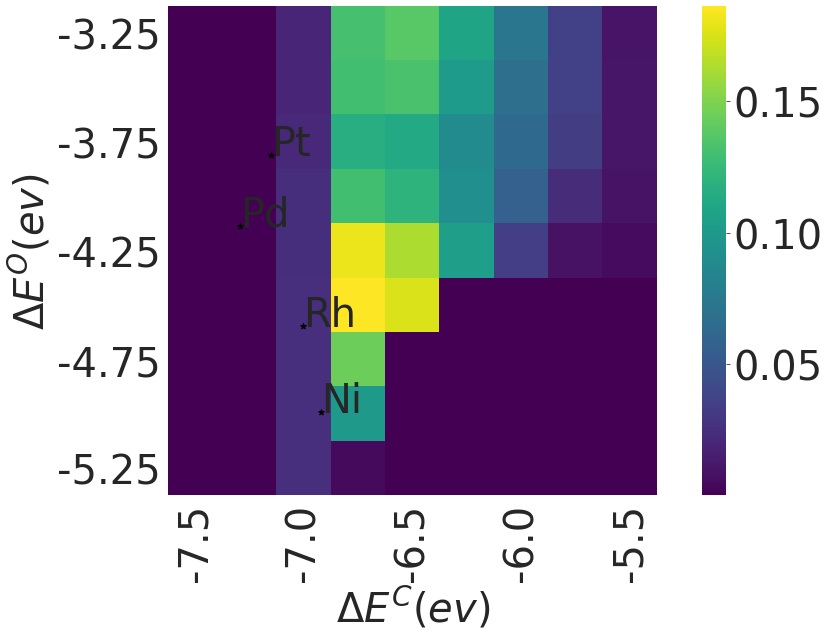

In [26]:
syngas_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
syngas_conv_df
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(syngas_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="Syngas Conversion",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
plt.savefig('paper_plots/2.6_syngas_conv_original.pdf', bbox_inches='tight')

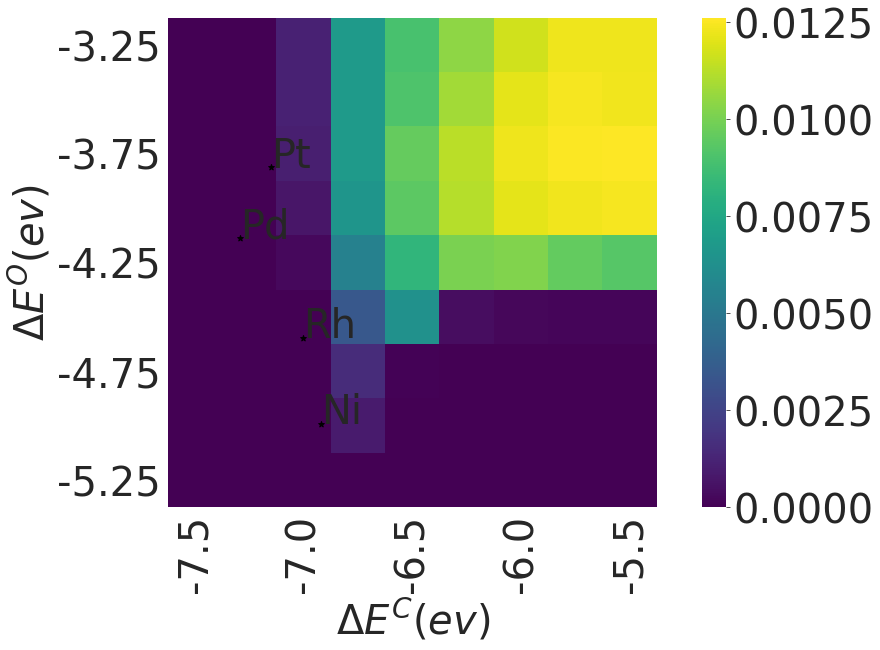

In [28]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            co2_out = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'CO2 out'].to_list()[0]
            h2o_out = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'H2O out'].to_list()[0]
#             if abs(syngas_conv) > 1:
#                 data[j][i] = 0
#             else:
            data[j][i] = abs(h2o_out) + abs(co2_out)
        except Exception as e:
            print(e, f"check log files {index}")
full_ox_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 40})
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(full_ox_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="Full Oxidation at C/O=1 without BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
plt.savefig('paper_plots/2.6_full_conv_original.pdf', bbox_inches='tight')

# Plots at C/O=0.8

In [4]:
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-10_atol_1e-20_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            ch4_conv = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'Max CH4 Conv'].to_list()[0]
            if abs(ch4_conv) > 1:
                data[j][i] = 0
            else:
                data[j][i] = abs(ch4_conv)
        except Exception as e:
            print(e, f"check log files {index}")
data 

[Errno 2] No such file or directory: '81.0_c-7.50o-5.25/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 81.0


array([[4.16333634e-15, 4.16333634e-15, 9.10634002e-02, 4.59778750e-01,
        5.24257505e-01, 4.49449602e-01, 3.58926447e-01, 4.53148115e-01,
        9.59467123e-01],
       [4.16333634e-15, 4.16333634e-15, 9.09648500e-02, 4.57701353e-01,
        5.09865883e-01, 4.19844301e-01, 3.38987337e-01, 4.31333240e-01,
        9.42023143e-01],
       [4.16333634e-15, 4.16333634e-15, 9.68963012e-02, 4.32304647e-01,
        4.44447069e-01, 3.79107349e-01, 3.23108003e-01, 4.09765779e-01,
        7.56085436e-01],
       [4.16333634e-15, 4.16333634e-15, 9.97296042e-02, 4.41334587e-01,
        4.42291014e-01, 3.77891495e-01, 3.24208838e-01, 3.30914468e-01,
        3.66778975e-01],
       [4.16333634e-15, 4.16333634e-15, 7.33199375e-02, 5.18259379e-01,
        5.27910661e-01, 4.14180434e-01, 3.39095946e-01, 3.04955594e-01,
        3.00188687e-01],
       [4.16333634e-15, 4.16333634e-15, 6.79553277e-02, 4.61915802e-01,
        6.14649048e-01, 4.73418638e-01, 3.51246169e-01, 2.87249067e-01,
        2.7

[Text(0.5, 1.0, 'CH4 Conversion at C/O=0.8'),
 Text(0.5, 60.0, '$\\Delta E^C(ev)$'),
 Text(348.0000000000001, 0.5, '$\\Delta E^O(ev)$')]

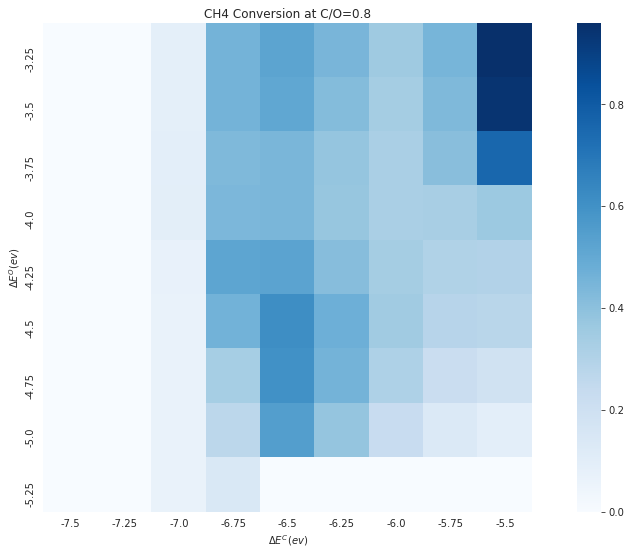

In [5]:
ch4_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
ch4_conv_df
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("Blues", as_cmap=True)
ax = sns.heatmap(ch4_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
ax.set(title="CH4 Conversion at C/O=0.8",
      xlabel="$\\Delta E^C(ev)$",
      ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
# ax.scatter(metal_x, metal_y, marker='*', color='black')
# for i, txt in enumerate(metal_names):
#     ax.annotate(txt,(metal_x[i], metal_y[i]))

# Syngas

In [6]:
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-10_atol_1e-20_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            h2_out = df.loc[df['C/O ratio'].round(2) == 0.8].loc[:,'H2 out'].to_list()[0]
            co_out = df.loc[df['C/O ratio'].round(2) == 0.8].loc[:,'CO out'].to_list()[0]
            ch4_in = df.loc[df['C/O ratio'].round(2) == 0.8].loc[:,'CH4 in'].to_list()[0]
            syngas_conv = (co_out + h2_out) / ch4_in
#             if abs(syngas_conv) > 1:
#                 data[j][i] = 0
#             else:
            data[j][i] = abs(syngas_conv)
        except Exception as e:
            print(e, f"check log files {index}")
data 

[Errno 2] No such file or directory: '81.0_c-7.50o-5.25/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 81.0


array([[2.52897812e-15, 2.74993451e+00, 2.74993131e+00, 2.74992991e+00,
        2.74991012e+00, 2.74791183e+00, 2.70833832e+00, 2.62651996e+00,
        2.53546983e+00],
       [2.52897811e-15, 2.74993107e+00, 2.74992934e+00, 2.74992658e+00,
        2.74987757e+00, 2.74516766e+00, 2.70138623e+00, 2.62753194e+00,
        2.54561684e+00],
       [2.52897812e-15, 2.74992922e+00, 2.74992840e+00, 2.74992360e+00,
        2.74984029e+00, 2.74472105e+00, 2.70311930e+00, 2.63143572e+00,
        2.54937993e+00],
       [2.52897812e-15, 2.74993526e+00, 2.74992848e+00, 2.74992713e+00,
        2.74989227e+00, 2.74785329e+00, 2.71207606e+00, 2.63917069e+00,
        2.55546313e+00],
       [2.52897812e-15, 6.20076767e-01, 2.74992851e+00, 2.74992840e+00,
        2.74992423e+00, 2.74981577e+00, 2.73844314e+00, 2.67048131e+00,
        2.57844922e+00],
       [2.52897812e-15, 3.77924109e-01, 2.74992847e+00, 2.74992848e+00,
        2.74992822e+00, 2.74991839e+00, 2.74971039e+00, 2.73024729e+00,
        2.6

[Text(0.5, 1.0, 'Syngas Conversion'),
 Text(0.5, 60.0, '$\\Delta E^C(ev)$'),
 Text(348.0000000000001, 0.5, '$\\Delta E^O(ev)$')]

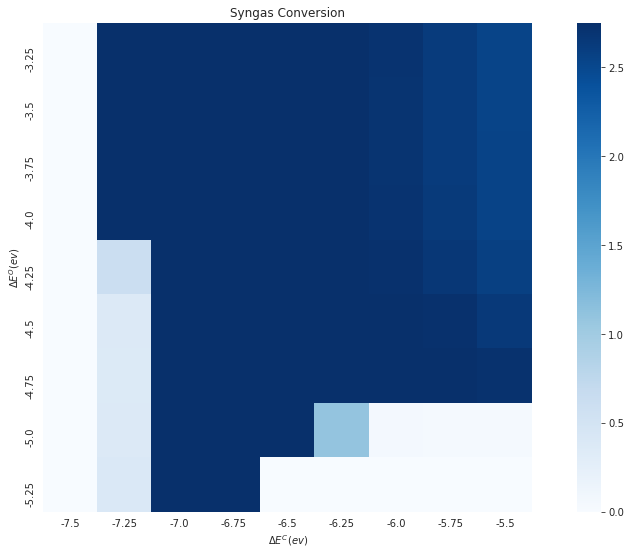

In [9]:
syngas_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
syngas_conv_df
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("Blues", as_cmap=True)
ax = sns.heatmap(syngas_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
ax.set(title="Syngas Conversion",
      xlabel="$\\Delta E^C(ev)$",
      ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
# ax.scatter(metal_x, metal_y, marker='*', color='black')
# for i, txt in enumerate(metal_names):
#     ax.annotate(txt,(metal_x[i], metal_y[i]))

## Plot the volcano plots for half change distance

In [7]:
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-10_atol_1e-20_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            half_conc_dist = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'Dist to 50 CH4 Conv'].to_list()[0]
            if half_conc_dist == 510:
                data[j][i] = 0
            else:
                data[j][i] = abs(half_conc_dist)
        except Exception as e:
            print(e, f"check log files {index}")
data 

[Errno 2] No such file or directory: '81.0_c-7.50o-5.25/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 81.0


array([[ 0.  , 12.93, 10.09, 10.06, 10.06, 10.07, 10.08, 10.09, 10.1 ],
       [ 0.  , 12.83, 10.09, 10.06, 10.06, 10.07, 10.08, 10.09, 10.1 ],
       [ 0.  , 13.05, 10.09, 10.06, 10.06, 10.07, 10.08, 10.09, 10.1 ],
       [ 0.  , 19.96, 10.06, 10.05, 10.06, 10.07, 10.08, 10.09, 10.1 ],
       [ 0.  ,  0.  , 10.07, 10.04, 10.05, 10.06, 10.08, 10.09, 10.1 ],
       [ 0.  ,  0.  , 10.3 , 10.04, 10.05, 10.06, 10.08, 10.1 , 10.11],
       [ 0.  ,  0.  , 11.48, 10.04, 10.21, 10.35, 10.41, 10.44, 10.46],
       [ 0.  ,  0.  , 11.74, 10.44, 14.97, 18.59, 19.94,  0.  ,  0.  ],
       [ 0.  ,  0.  , 11.53, 14.08,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

[Text(0.5, 1.0, 'half concentration disctantces'),
 Text(0.5, 60.0, '$\\Delta E^C(ev)$'),
 Text(348.0000000000001, 0.5, '$\\Delta E^O(ev)$')]

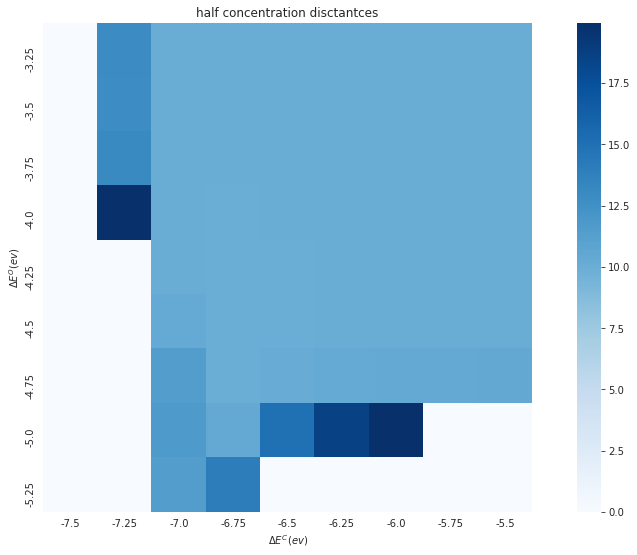

In [8]:
half_conc_dist_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("Blues", as_cmap=True)
ax = sns.heatmap(half_conc_dist_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
ax.set(title="half concentration disctantces",
      xlabel="$\\Delta E^C(ev)$",
      ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
# ax.scatter(metal_x, metal_y, marker='*', color='black')
# for i, txt in enumerate(metal_names):
#     ax.annotate(txt,(metal_x[i], metal_y[i]))

## Distances to max temperature

In [10]:
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-10_atol_1e-20_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            max_temp_dist = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'Dist to max temp'].to_list()[0]
            data[j][i] = abs(max_temp_dist)
        except Exception as e:
            print(e, f"check log files {index}")
data 

[Errno 2] No such file or directory: '81.0_c-7.50o-5.25/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 81.0


array([[ 9.26, 13.58, 10.2 , 10.12, 10.13, 10.15, 10.16, 10.17, 10.15],
       [10.  , 13.46, 10.2 , 10.13, 10.14, 10.15, 10.16, 10.16, 10.15],
       [10.01, 13.64, 10.21, 10.14, 10.15, 10.16, 10.16, 10.16, 10.15],
       [10.  , 70.  , 10.17, 10.13, 10.14, 10.16, 10.16, 10.16, 10.15],
       [10.  , 70.  , 10.15, 10.12, 10.14, 10.16, 10.16, 10.16, 10.15],
       [10.01, 70.  , 10.46, 10.11, 10.13, 10.15, 10.17, 10.17, 10.17],
       [ 9.26, 70.  , 20.  , 10.1 , 10.28, 10.43, 10.49, 10.51, 10.52],
       [10.  , 70.  , 20.  , 10.47, 15.01, 18.64, 70.  , 70.  , 70.  ],
       [ 0.  , 70.  , 20.  , 14.15, 70.  , 70.  , 70.  , 70.  , 70.  ]])

[Text(0.5, 1.0, 'half concentration disctantces'),
 Text(0.5, 60.0, '$\\Delta E^C(ev)$'),
 Text(348.0000000000001, 0.5, '$\\Delta E^O(ev)$')]

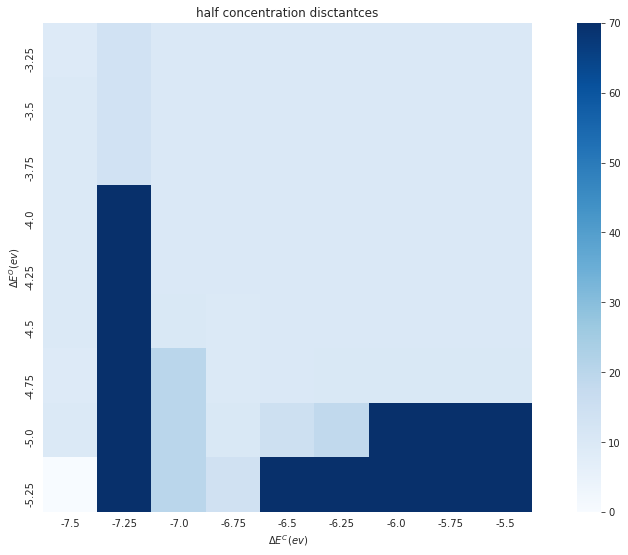

In [11]:
max_temp_dist_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("Blues", as_cmap=True)
ax = sns.heatmap(max_temp_dist_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
ax.set(title="half concentration disctantces",
      xlabel="$\\Delta E^C(ev)$",
      ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
# ax.scatter(metal_x, metal_y, marker='*', color='black')
# for i, txt in enumerate(metal_names):
#     ax.annotate(txt,(metal_x[i], metal_y[i]))

In [28]:
import shutil
rtols = [1.0e-10, 1.0e-09, 1.0e-08, 1.0e-07, 1.0e-06]
atols = [1.0e-20, 1.0e-18, 1.0e-16, 1.0e-14, 1.0e-12]
tol_combs = []
for index in range(len(rtols)):
    tol_combs.append([rtols[index], atols[index]])
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1
        for tol_comb in tol_combs:
            f_path = '{}_c{:.2f}o{:.2f}/rtol_{}_atol_{}'.format(index, c_binding_energy, o_binding_energy, tol_comb[0], tol_comb[1])
            shutil.rmtree(f_path)
